## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy import stats 


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_data_df["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data_df[combined_data_df[['Mouse ID','Timepoint']].duplicated(keep=False)]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Final_df = combined_data_df.loc[combined_data_df["Mouse ID"]!='g989']
Final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
Final_df["Mouse ID"].value_counts()

l509    10
j365    10
x773    10
s508    10
z578    10
        ..
o848     1
t573     1
f932     1
x226     1
v199     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_regimen = Final_df.groupby('Drug Regimen')["Tumor Volume (mm3)"]
mean = drug_regimen.mean()
median= drug_regimen.median()
variance= drug_regimen.var()
std = drug_regimen.std()
sem = drug_regimen.sem()

# Assemble the resulting series into a single summary dataframe.
summary_df=pd.DataFrame({"Mean":mean,
                         "Median":median,
                         "Variance":variance,
                         "Standarad Deviation":std,
                         "SEM":sem
                        })

summary_df

,Mean,Median,Variance,Standarad Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen = Final_df.groupby('Drug Regimen').aggregate({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
drug_regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

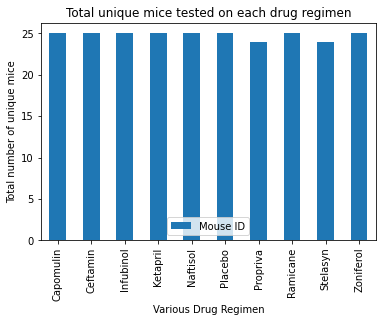

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_regimen = Final_df.groupby('Drug Regimen')
data = drug_regimen["Mouse ID"].nunique()

df = pd.DataFrame(data)
chart = df.plot(kind='bar')
plt.title("Total unique mice tested on each drug regimen")
plt.xlabel("Various Drug Regimen")
plt.ylabel("Total number of unique mice")
plt.show()

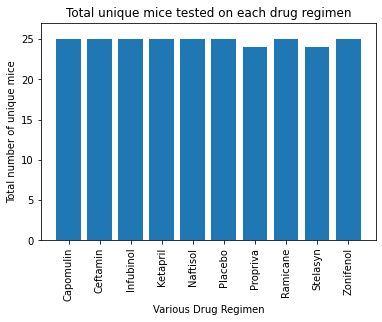

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_regimen = Final_df.groupby('Drug Regimen')
labels=["Capomulin","Ceftamin","Infubinol","Ketapril",
        "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zonifenol"]

x_axis = np.arange(0,len(drug_regimen))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
y_axis = drug_regimen["Mouse ID"].nunique()
plt.bar(x_axis,y_axis)
plt.xticks(tick_locations,labels, rotation ='vertical')
plt.ylim(0,max(y_axis)+2)
plt.title("Total unique mice tested on each drug regimen")
plt.xlabel("Various Drug Regimen")
plt.ylabel("Total number of unique mice")
plt.show()

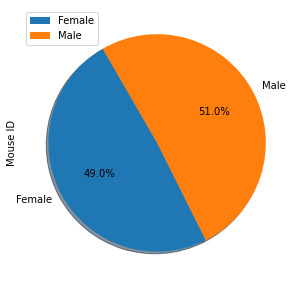

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
distribution = Final_df.groupby("Sex")['Mouse ID'].count()
df = pd.DataFrame(distribution)
chart = df.plot(subplots= True, kind='pie',figsize=(7,5),
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.show()

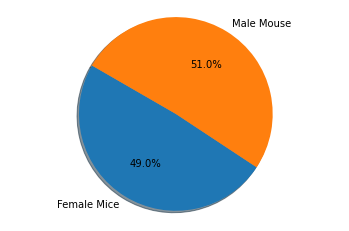

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution = Final_df.groupby("Sex")["Mouse ID"].count()
gender = ["Female Mice", "Male Mouse"]
plt.pie(distribution, labels=gender,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

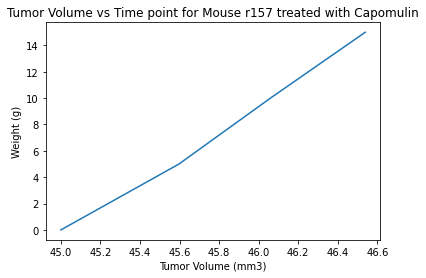

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
abc = Final_df.loc[Final_df["Drug Regimen"]=='Capomulin']
xyz = Final_df.loc[Final_df["Mouse ID"]=='r157']

x_axis = xyz["Tumor Volume (mm3)"]
y_axis = xyz["Timepoint"]
plt.plot(x_axis, y_axis)
plt.title("Tumor Volume vs Time point for Mouse r157 treated with Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

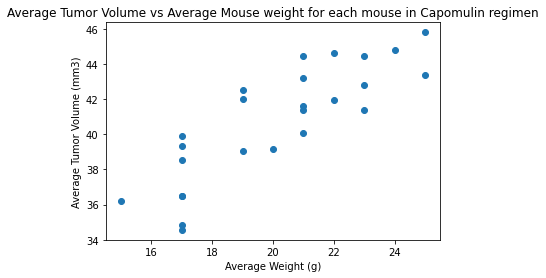

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
abc = Final_df.loc[Final_df["Drug Regimen"]=='Capomulin']
xyz=abc.groupby('Mouse ID')
final = xyz.mean()

x_axis = final["Weight (g)"]
y_axis = final["Tumor Volume (mm3)"]
plt.scatter(x_axis,y_axis)
plt.title("Average Tumor Volume vs Average Mouse weight for each mouse in Capomulin regimen")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

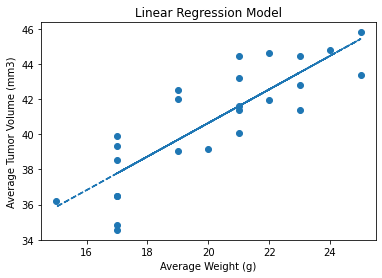

The correlation coefficient between mouse weight and avg tumor volume is 0.84


In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


abc = Final_df.loc[Final_df["Drug Regimen"]=='Capomulin']
xyz=abc.groupby('Mouse ID')
final = xyz.mean()

x_axis = final["Weight (g)"]
y_axis = final["Tumor Volume (mm3)"]
tv_slope, tv_int, tv_r, tv_p, tv_std_err = stats.linregress(x_axis, y_axis)
tv_fit = tv_slope * x_axis + tv_int
plt.plot(x_axis,tv_fit,"--")
plt.scatter(x_axis,y_axis)
plt.title("Linear Regression Model")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


print(f"The correlation coefficient between mouse weight and avg tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
